In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import models


model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))



170498071/170498071 [==============================] - 2s 0us/step
Epoch 1/10
1563/1563 [==============================] - 77s 49ms/step - loss: 1.5516 - accuracy: 0.4314 - val_loss: 1.2723 - val_accuracy: 0.5432
Epoch 2/10
1563/1563 [==============================] - 72s 46ms/step - loss: 1.1758 - accuracy: 0.5844 - val_loss: 1.1042 - val_accuracy: 0.6097
Epoch 3/10
1563/1563 [==============================] - 72s 46ms/step - loss: 1.0252 - accuracy: 0.6410 - val_loss: 1.0478 - val_accuracy: 0.6301
Epoch 4/10
1563/1563 [==============================] - 71s 46ms/step - loss: 0.9346 - accuracy: 0.6725 - val_loss: 0.9590 - val_accuracy: 0.6642
Epoch 5/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.8648 - accuracy: 0.6980 - val_loss: 0.9118 - val_accuracy: 0.6813
Epoch 6/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.8088 - accuracy: 0.7173 - val_loss: 0.9047 - val_accuracy: 0.6802
Epoch 7/10
1563/1563 [==============================] - 7

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping


(x_train, y_train), (x_test, y_test) = cifar10.load_data()


x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)


model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


# history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_val, y_val))

early_stopping = EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_val, y_val), callbacks=[early_stopping])


test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)



Epoch 1/20
1250/1250 [==============================] - 63s 50ms/step - loss: 1.5139 - accuracy: 0.4476 - val_loss: 1.2671 - val_accuracy: 0.5383
Epoch 2/20
1250/1250 [==============================] - 61s 48ms/step - loss: 1.1457 - accuracy: 0.5939 - val_loss: 1.0743 - val_accuracy: 0.6177
Epoch 3/20
1250/1250 [==============================] - 61s 49ms/step - loss: 0.9797 - accuracy: 0.6571 - val_loss: 1.0216 - val_accuracy: 0.6404
Epoch 4/20
1250/1250 [==============================] - 61s 49ms/step - loss: 0.8671 - accuracy: 0.6966 - val_loss: 0.9147 - val_accuracy: 0.6905
Epoch 5/20
1250/1250 [==============================] - 62s 49ms/step - loss: 0.7731 - accuracy: 0.7314 - val_loss: 0.9079 - val_accuracy: 0.6938
Epoch 6/20
1250/1250 [==============================] - 61s 49ms/step - loss: 0.6981 - accuracy: 0.7566 - val_loss: 0.8711 - val_accuracy: 0.7038
Epoch 7/20
1250/1250 [==============================] - 61s 49ms/step - loss: 0.6327 - accuracy: 0.7770 - val_loss: 0.9948 -

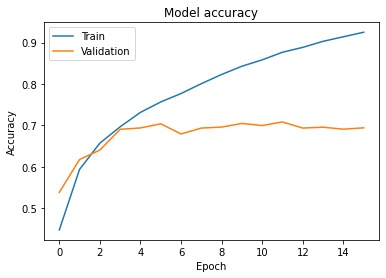

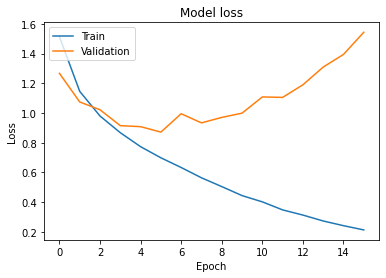

In [ ]:
import matplotlib.pyplot as plt


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
